## Turibine Sensor Tag by Dynamic Time Warping

### データの準備
NSAS の Turbine データ [Turbofan Engine Degradation Simulation Data Set](https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/#turbofan) を加工した train.csv と test.csv を利用します。あらかじめ "/dbfs/mnt/databricks-fs/turbine/" にアップロードしておきます。

In [3]:
# 画像の保存パスを指定
img_path = "/dbfs/mnt/databricks-fs/image/"

In [4]:
# データ読み込み
import pandas as pd

df_path="/dbfs/mnt/databricks-fs/turbine/"
turbine_train = pd.read_csv(df_path+"train.csv", header='infer')
display(turbine_train)

id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL,label1,label2,cycle_norm
1,1,0.4597701149425287,0.16666666666666666,0.0,0.0,0.18373493975903446,0.4068018312622641,0.3097569209993232,0.0,1.0,0.7262479871175601,0.24242424242402194,0.10975500314098953,0.0,0.3690476190476204,0.6332622601279212,0.2058823529409892,0.1996078026628112,0.3639861485186629,0.0,0.3333333333333357,0.0,0.0,0.7131782945736447,0.7246616956641816,191,0,0,0.0
1,2,0.6091954022988506,0.25,0.0,0.0,0.2831325301204686,0.4530194026596917,0.3526333558406485,0.0,1.0,0.628019323671495,0.2121212121210192,0.10024230458584073,0.0,0.3809523809523832,0.7654584221748308,0.2794117647058556,0.16281349984518556,0.41131204309350267,0.0,0.3333333333333357,0.0,0.0,0.6666666666666643,0.7310135321734351,190,0,0,0.002770083102493075
1,3,0.2528735632183908,0.75,0.0,0.0,0.34337349397591765,0.36952256376716974,0.370526671168129,0.0,1.0,0.7101449275362341,0.2727272727270247,0.1400430763708158,0.0,0.25000000000000355,0.7953091684434952,0.2205882352941444,0.1717927546702427,0.35744517121970176,0.0,0.1666666666666714,0.0,0.0,0.6279069767441854,0.6213753106876538,189,0,0,0.0055401662049861505
1,4,0.5402298850574713,0.5,0.0,0.0,0.34337349397591765,0.25615870939612506,0.3311951384199858,0.0,1.0,0.7407407407407476,0.31818181818198354,0.1245176343892993,0.0,0.16666666666666785,0.8891257995735629,0.29411764705855603,0.17488904943750327,0.16660253943824446,0.0,0.3333333333333357,0.0,0.0,0.5736434108527142,0.6623860811930413,188,0,0,0.008310249307479225
1,5,0.3908045977011494,0.3333333333333333,0.0,0.0,0.3493975903614341,0.257466753869636,0.4046252532072927,0.0,1.0,0.6682769726247955,0.24242424242402194,0.14995961590236107,0.0,0.25595238095238315,0.7462686567164241,0.2352941176468448,0.1747342346991445,0.40207772220084337,0.0,0.4166666666666714,0.0,0.0,0.5891472868217029,0.7045015189174251,187,0,0,0.0110803324099723
1,6,0.2528735632183908,0.4166666666666666,0.0,0.0,0.2680722891566347,0.2927839546544604,0.2721134368669809,0.0,1.0,0.7761674718196474,0.18181818181801648,0.1254150587813001,0.0,0.18452380952380665,0.63752665245201,0.2205882352941444,0.16983176798431288,0.3305117352828049,0.0,0.25,0.0,0.0,0.651162790697672,0.652720243026792,186,0,0,0.013850415512465377
1,7,0.5574712643678161,0.5833333333333334,0.0,0.0,0.3825301204819312,0.4639197732722948,0.2619851451721793,0.0,1.0,0.7230273752012977,0.18181818181801648,0.1678183613030555,0.0,0.3035714285714306,0.7739872068230369,0.2205882352941444,0.1670967076065608,0.2789534436321688,0.0,0.3333333333333357,0.0,0.0,0.7441860465116292,0.6672190002761695,185,0,0,0.016620498614958446
1,8,0.3045977011494253,0.75,0.0,0.0,0.4066265060240824,0.2598648354044073,0.3160027008777853,0.0,1.0,0.6441223832528209,0.1515151515150137,0.0855694157767175,0.0,0.23214285714285765,0.8059701492537386,0.2205882352941444,0.16064609350809889,0.3181993074259353,0.0,0.25,0.0,0.0,0.6434108527131777,0.5749792874896471,184,0,0,0.01939058171745152
1,9,0.5459770114942529,0.5833333333333334,0.0,0.0,0.27409638554217963,0.434706780030524,0.2118501012829164,0.0,1.0,0.6183574879227081,0.2272727272729753,0.11096652607017887,0.0,0.26190476190476275,0.6609808102345339,0.25,0.13288265042832134,0.18430165448249625,0.0,0.3333333333333357,0.0,0.0,0.7054263565891432,0.7075393537696755,183,0,0,0.0221606648199446
1,10,0.31034482758620685,0.5833333333333334,0.0,0.0,0.15060240963856586,0.4403749727490762,0.3073936529372041,0.0,1.0,0.6022544283413964,0.2272727272729753,0.13447904514045206,0.0,0.10714285714285764,0.6609808102345339,0.26470588235270043,0.1519248632469825,0.398999615236626,0.0,0.4166666666666714,0.0,0.0,0.6279069767441854,0.7942557304611952,182,0,0,0.024930747922437668


In [5]:
# Turbine ID = 1 のみ抽出したデータの表示
display(turbine_train[turbine_train["id"]==1])

id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL,label1,label2,cycle_norm
1,1,0.4597701149425287,0.16666666666666666,0.0,0.0,0.18373493975903446,0.4068018312622641,0.3097569209993232,0.0,1.0,0.7262479871175601,0.24242424242402194,0.10975500314098953,0.0,0.3690476190476204,0.6332622601279212,0.2058823529409892,0.1996078026628112,0.3639861485186629,0.0,0.3333333333333357,0.0,0.0,0.7131782945736447,0.7246616956641816,191,0,0,0.0
1,2,0.6091954022988506,0.25,0.0,0.0,0.2831325301204686,0.4530194026596917,0.3526333558406485,0.0,1.0,0.628019323671495,0.2121212121210192,0.10024230458584073,0.0,0.3809523809523832,0.7654584221748308,0.2794117647058556,0.16281349984518556,0.41131204309350267,0.0,0.3333333333333357,0.0,0.0,0.6666666666666643,0.7310135321734351,190,0,0,0.002770083102493075
1,3,0.2528735632183908,0.75,0.0,0.0,0.34337349397591765,0.36952256376716974,0.370526671168129,0.0,1.0,0.7101449275362341,0.2727272727270247,0.1400430763708158,0.0,0.25000000000000355,0.7953091684434952,0.2205882352941444,0.1717927546702427,0.35744517121970176,0.0,0.1666666666666714,0.0,0.0,0.6279069767441854,0.6213753106876538,189,0,0,0.0055401662049861505
1,4,0.5402298850574713,0.5,0.0,0.0,0.34337349397591765,0.25615870939612506,0.3311951384199858,0.0,1.0,0.7407407407407476,0.31818181818198354,0.1245176343892993,0.0,0.16666666666666785,0.8891257995735629,0.29411764705855603,0.17488904943750327,0.16660253943824446,0.0,0.3333333333333357,0.0,0.0,0.5736434108527142,0.6623860811930413,188,0,0,0.008310249307479225
1,5,0.3908045977011494,0.3333333333333333,0.0,0.0,0.3493975903614341,0.257466753869636,0.4046252532072927,0.0,1.0,0.6682769726247955,0.24242424242402194,0.14995961590236107,0.0,0.25595238095238315,0.7462686567164241,0.2352941176468448,0.1747342346991445,0.40207772220084337,0.0,0.4166666666666714,0.0,0.0,0.5891472868217029,0.7045015189174251,187,0,0,0.0110803324099723
1,6,0.2528735632183908,0.4166666666666666,0.0,0.0,0.2680722891566347,0.2927839546544604,0.2721134368669809,0.0,1.0,0.7761674718196474,0.18181818181801648,0.1254150587813001,0.0,0.18452380952380665,0.63752665245201,0.2205882352941444,0.16983176798431288,0.3305117352828049,0.0,0.25,0.0,0.0,0.651162790697672,0.652720243026792,186,0,0,0.013850415512465377
1,7,0.5574712643678161,0.5833333333333334,0.0,0.0,0.3825301204819312,0.4639197732722948,0.2619851451721793,0.0,1.0,0.7230273752012977,0.18181818181801648,0.1678183613030555,0.0,0.3035714285714306,0.7739872068230369,0.2205882352941444,0.1670967076065608,0.2789534436321688,0.0,0.3333333333333357,0.0,0.0,0.7441860465116292,0.6672190002761695,185,0,0,0.016620498614958446
1,8,0.3045977011494253,0.75,0.0,0.0,0.4066265060240824,0.2598648354044073,0.3160027008777853,0.0,1.0,0.6441223832528209,0.1515151515150137,0.0855694157767175,0.0,0.23214285714285765,0.8059701492537386,0.2205882352941444,0.16064609350809889,0.3181993074259353,0.0,0.25,0.0,0.0,0.6434108527131777,0.5749792874896471,184,0,0,0.01939058171745152
1,9,0.5459770114942529,0.5833333333333334,0.0,0.0,0.27409638554217963,0.434706780030524,0.2118501012829164,0.0,1.0,0.6183574879227081,0.2272727272729753,0.11096652607017887,0.0,0.26190476190476275,0.6609808102345339,0.25,0.13288265042832134,0.18430165448249625,0.0,0.3333333333333357,0.0,0.0,0.7054263565891432,0.7075393537696755,183,0,0,0.0221606648199446
1,10,0.31034482758620685,0.5833333333333334,0.0,0.0,0.15060240963856586,0.4403749727490762,0.3073936529372041,0.0,1.0,0.6022544283413964,0.2272727272729753,0.13447904514045206,0.0,0.10714285714285764,0.6609808102345339,0.26470588235270043,0.1519248632469825,0.398999615236626,0.0,0.4166666666666714,0.0,0.0,0.6279069767441854,0.7942557304611952,182,0,0,0.024930747922437668


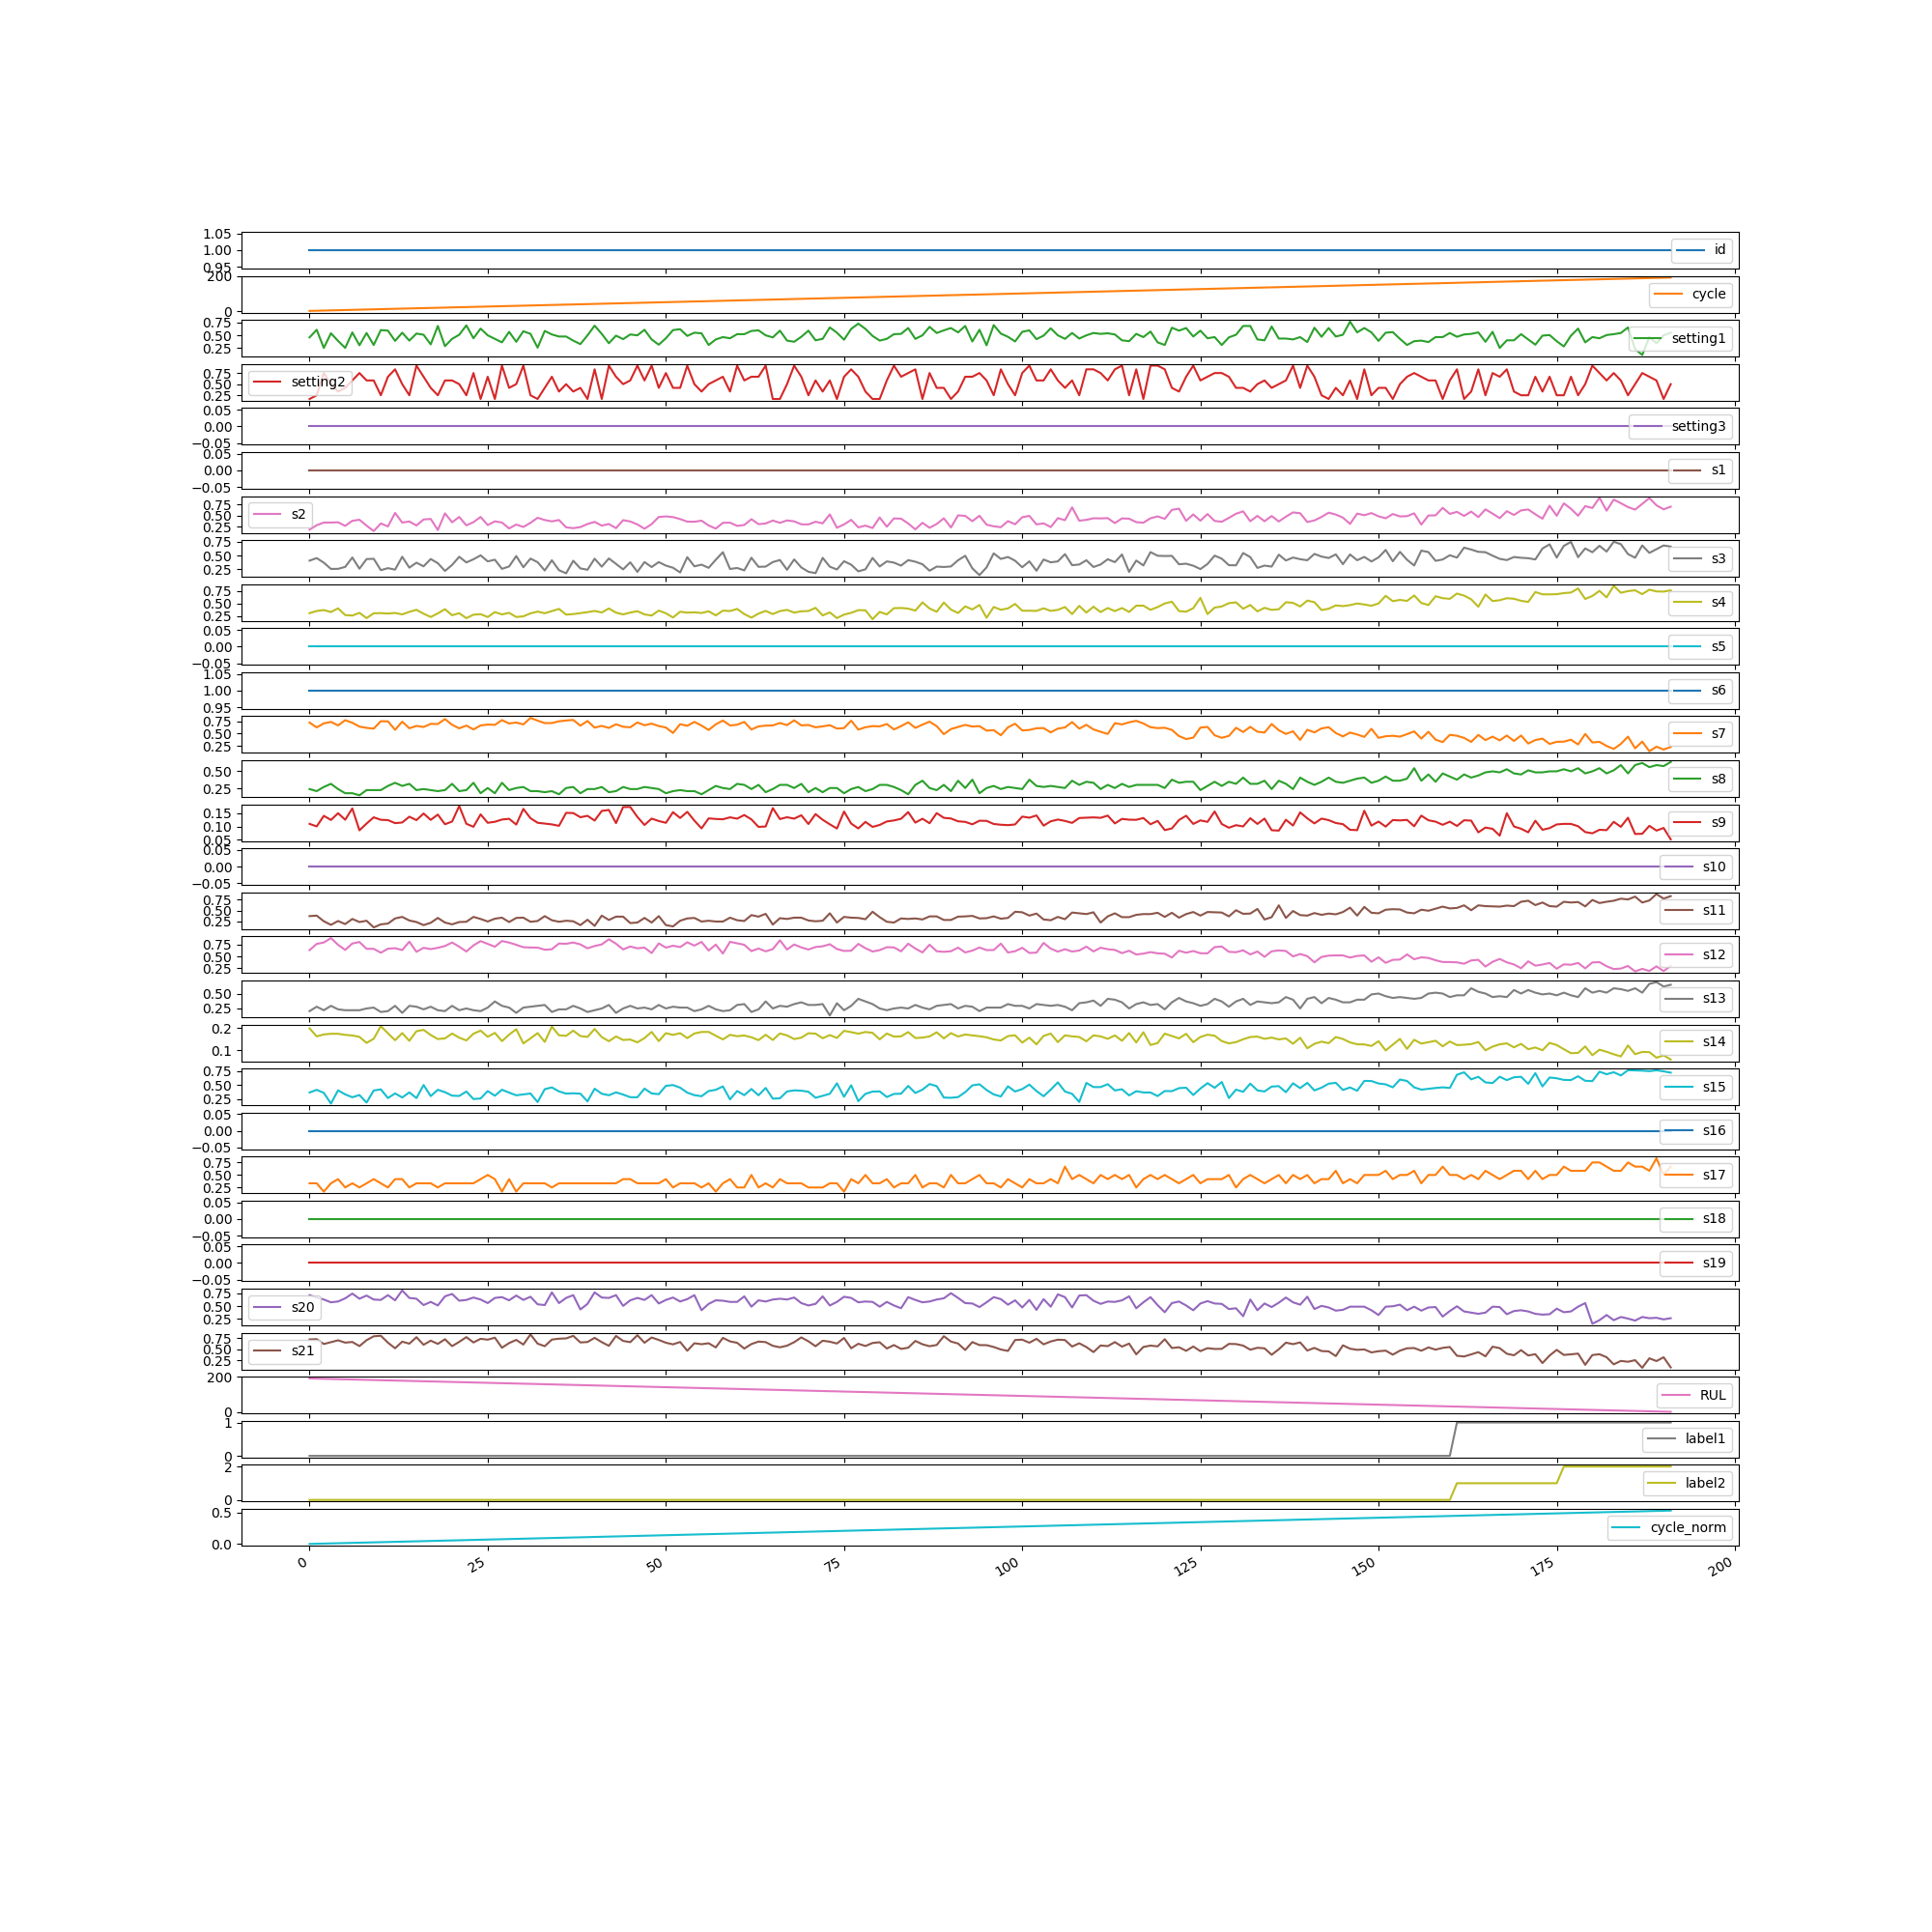

In [6]:
import matplotlib.pyplot as plt

plt.clf()
plt.figure()
turbine_train[turbine_train["id"]==1].plot(subplots=True, sharex=True, figsize=(20,20))
plt.savefig(img_path+"turbine1-line.png")
display(plt.show())

In [7]:
from dtaidistance import dtw
import numpy as np

ds = dtw.distance_matrix_fast(turbine_train.iloc[:,5:26].T.values,compact=False)
print(ds)

[[ inf 67.21442692 63.95782745 68.2794819 0.
 142.21462653 83.89915377 45.49979061 31.44910228 0.
 63.35123354 86.41275712 48.11821785 35.41977105 68.03061647
 0. 65.06593878 0. 0. 77.94221888
 81.3279731 ]
 [ inf inf 9.34888815 8.77350965 67.21442692
 58.48815656 13.76538071 12.95524299 16.83028268 67.21442692
 9.24914818 14.27702627 12.59118018 16.60744965 8.81367367
 67.21442692 9.03787567 67.21442692 67.21442692 13.28225099
 13.76710094]
 [ inf inf inf 8.84430623 63.95782745
 59.67738494 13.43132328 11.79131092 15.6992363 63.95782745
 9.10727948 14.01348822 11.39817778 15.37313815 8.82095289
 63.95782745 8.69118015 63.95782745 63.95782745 12.858922
 13.55264242]
 [ inf inf inf inf 68.2794819
 57.066999 13.37698599 11.71741299 16.1129762 68.2794819
 7.18314463 13.95713256 11.25008215 15.63760549 7.66579642
 68.2794819 8.21708554 68.2794819 68.2794819 12.97982936
 13.62887254]
 [ inf inf inf inf inf
 142.21462653 83.89915377 45.49979061 31.44910228 0.
 63.35123354 86.41275712 48.11821785 35.41977105 68.03061647
 0. 65.06593878 0. 0. 77.94221888
 81.3279731 ]
 [ inf inf inf inf inf
 inf 56.61920525 49.71425004 38.07132082 142.21462653
 54.50235399 54.25931704 51.65467082 40.71289387 58.66357789
 142.21462653 60.32464256 142.21462653 142.21462653 60.00745702
 57.84363224]
 [ inf inf inf inf inf
 inf inf 15.28584846 18.75178237 83.89915377
 14.08256269 6.93906574 14.53567176 18.18318297 13.09802234
 83.89915377 12.91721178 83.89915377 83.89915377 8.15243883
 8.09664396]
 [ inf inf inf inf inf
 inf inf inf 8.42959423 45.49979061
 10.51406498 16.73736853 4.83934865 8.46370381 11.96895737
 45.49979061 11.28390717 45.49979061 45.49979061 14.44872673
 15.82131067]
 [ inf inf inf inf inf
 inf inf inf inf 31.44910228
 15.05177664 20.13462231 8.70734167 2.71397979 16.080842
 31.44910228 15.13283735 31.44910228 31.44910228 18.27325738
 19.53867078]
 [ inf inf inf inf inf
 inf inf inf inf inf
 63.35123354 86.41275712 48.11821785 35.41977105 68.03061647
 0. 65.06593878 0. 0. 77.94221888
 81.3279731 ]
 [ inf inf inf inf inf
 inf inf inf inf inf
 inf 14.76178447 10.05891513 14.84161414 8.10309654
 63.35123354 8.54354343 63.35123354 63.35123354 13.63863979
 14.41307752]
 [ inf inf inf inf inf
 inf inf inf inf inf
 inf inf 15.97749785 19.58663616 13.70662676
 86.41275712 13.5397375 86.41275712 86.41275712 8.6162093
 8.38158087]
 [ inf inf inf inf inf
 inf inf inf inf inf
 inf inf inf 8.4532018 11.55119864
 48.11821785 10.96617712 48.11821785 48.11821785 13.95496067
 15.20468297]
 [ inf inf inf inf inf
 inf inf inf inf inf
 inf inf inf inf 15.6282114
 35.41977105 14.86463169 35.41977105 35.41977105 17.81557883
 19.09215532]
 [ inf inf inf inf inf
 inf inf inf inf inf
 inf inf inf inf inf
 68.03061647 8.32532786 68.03061647 68.03061647 12.68996009
 13.29469135]
 [ inf inf inf inf inf
 inf inf inf inf inf
 inf inf inf inf inf
 inf 65.06593878 0. 0. 77.94221888
 81.3279731 ]
 [ inf inf inf inf inf
 inf inf inf inf inf
 inf inf inf inf inf
 inf inf 65.06593878 65.06593878 12.41670024
 13.18018224]
 [ inf inf inf inf inf
 inf inf inf inf inf
 inf inf inf inf inf
 inf inf inf 0. 77.94221888
 81.3279731 ]
 [ inf inf inf inf inf
 inf inf inf inf inf
 inf inf inf inf inf
 inf inf inf inf 77.94221888
 81.3279731 ]
 [ inf inf inf inf inf
 inf inf inf inf inf
 inf inf inf inf inf
 inf inf inf inf inf
 8.47100253]
 [ inf inf inf inf inf
 inf inf inf inf inf
 inf inf inf inf inf
 inf inf inf inf inf
 inf]]

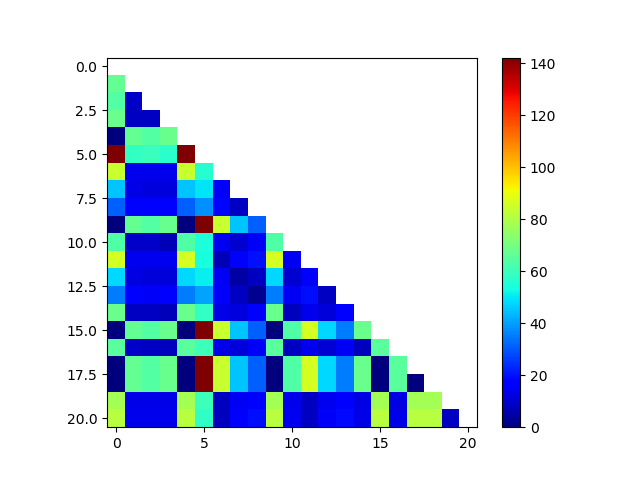

In [8]:
import matplotlib.pyplot as plt
plt.clf()
plt.figure()
plt.imshow(ds.T,interpolation='nearest',vmin=0,cmap='jet')
plt.colorbar()
plt.savefig(img_path+"turbine1-matplotlib-heatmap.png")
fig = plt.show()
display(fig)

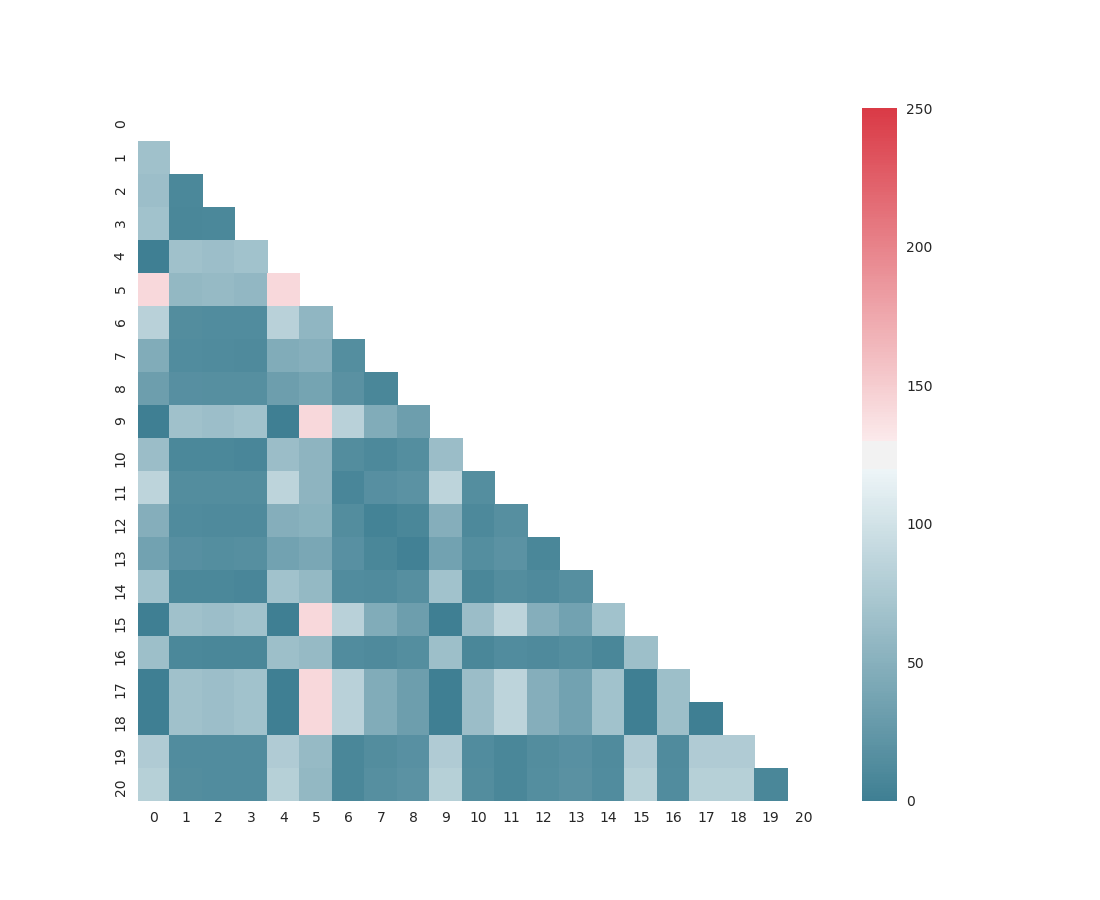

In [9]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

mask = np.zeros_like(ds, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.clf()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax = sns.heatmap(ds.T, mask=mask, vmin=0, vmax=250, cmap=cmap)

plt.savefig(img_path+"turbine1-seaborn-heatmap.png")
display(f)

In [10]:
from dtaidistance import clustering

model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(turbine_train.iloc[:,5:26].T.values)

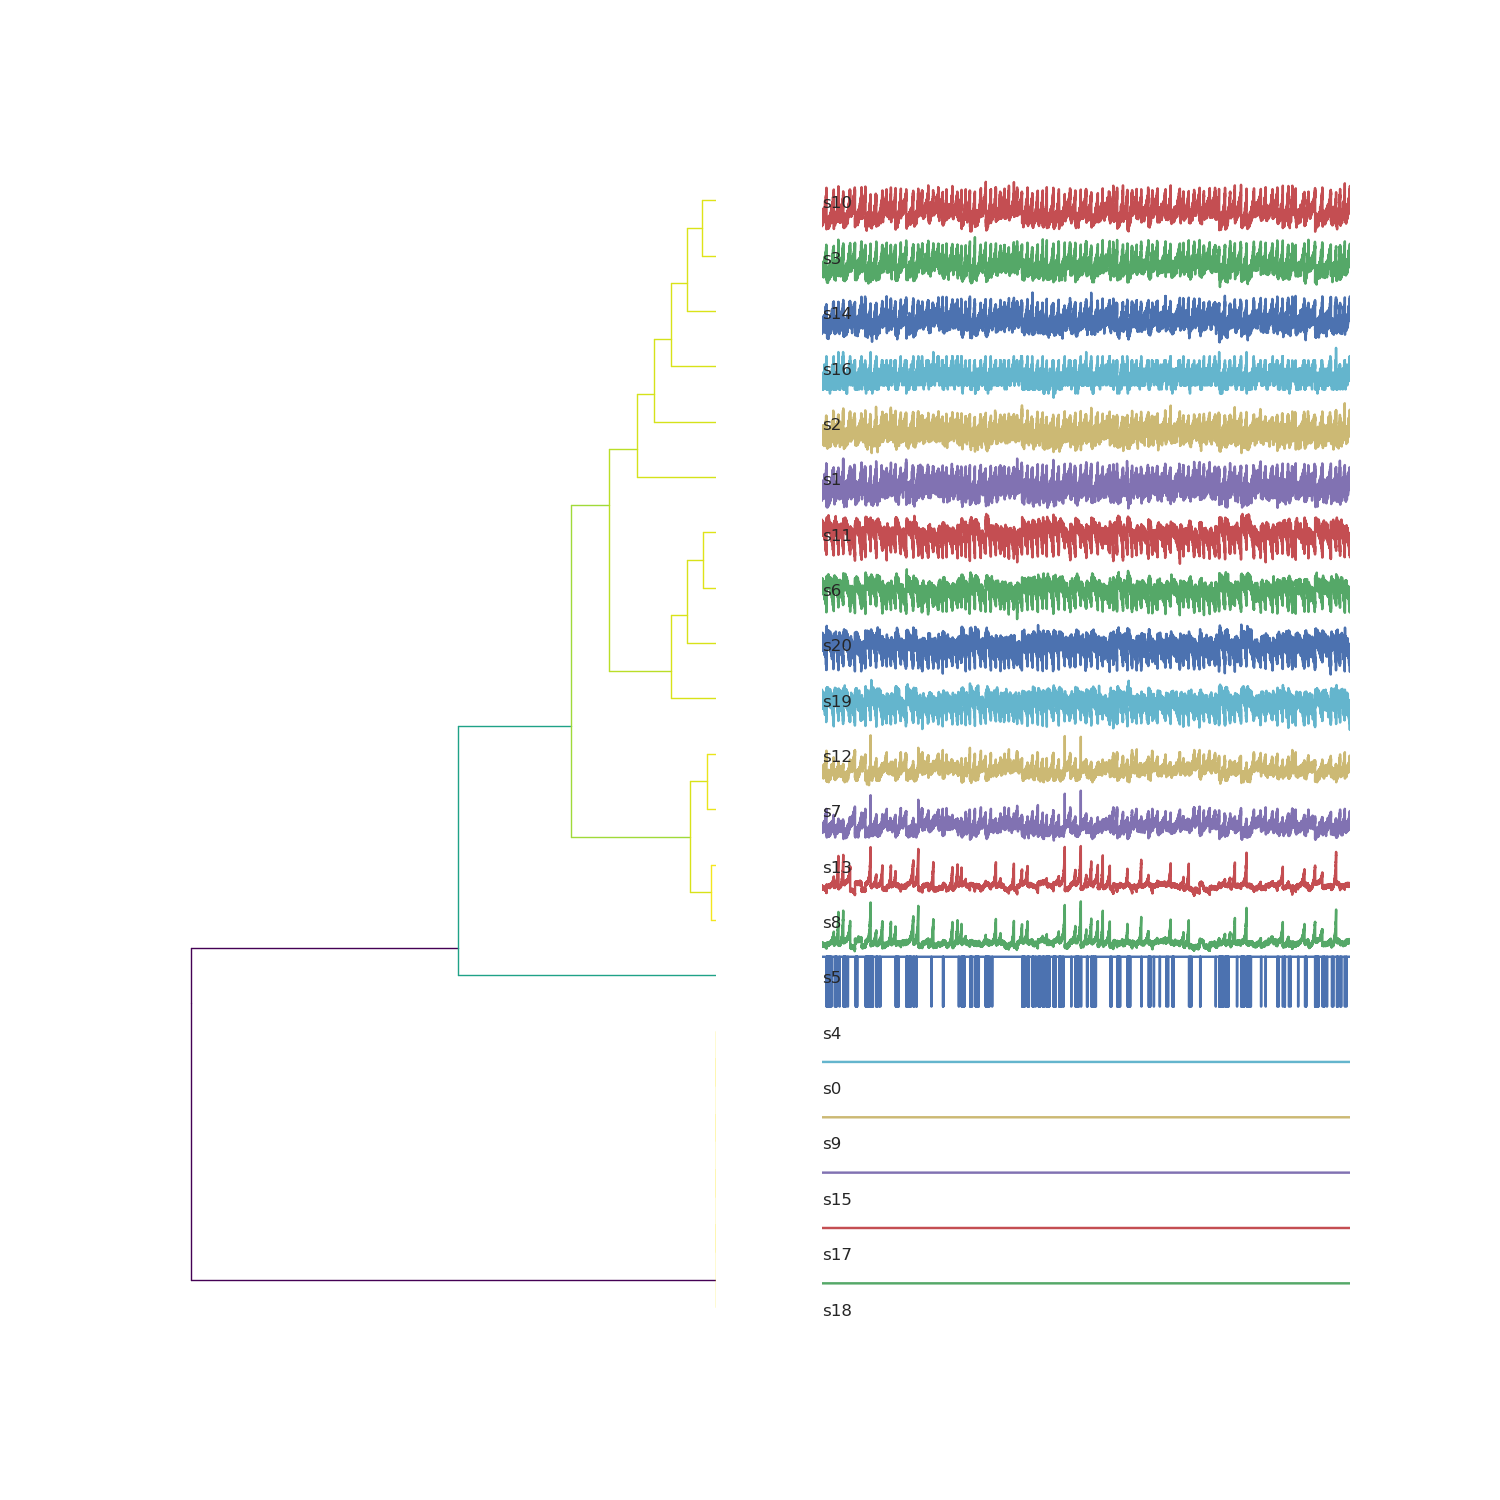

In [11]:
import matplotlib.pyplot as plt

show_ts_label = lambda idx: "s" + str(idx)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
show_ts_label = lambda idx: "s" + str(idx)
ax = model3.plot(img_path+"turbine1-hierarchy-scipy.png", axes=ax, show_ts_label=show_ts_label,
                 ts_height = -30, show_tr_label=False,ts_sample_length=2)
display(fig)

In [12]:
# from PIL import Image

# import numpy as np
# im = Image.open(img_path+"hierarchy-scipy.png")
# im_list = np.asarray(im)

# plt.clf()
# plt.figure(figsize=(30, 30))
# plt.imshow(im_list)
# display(plt.show())